# Data exploration

In [1]:
# Imports
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

## Train data
The train data contains normal traces (positive data). It has 4855 traces and 14 types.

### Occurence of each key in the file
Investigate how often every log key (type) occurs in the whole file (min, max, avg)

In [152]:
# Counts the occurences of each log key (event) in the whole dataset.
def count_occurrences(file_path):
    # Initialize a dictionary to store the counts of each type
    type_counts = defaultdict(int)
    length_counts = defaultdict(int)
    
    with open(file_path, 'r') as file:
        # Read the first line to skip the metadata
        header = file.readline().strip()
        total_lines, num_types = map(int, header.split())
        
        # Read and process each subsequent line
        for line in file:
            # Split the line into numbers
            numbers = list(map(int, line.strip().split()))
            # Skip the first two numbers
            length = numbers[1]
            trace = numbers[2:]
            # Count the occurrences of each type in the trace
            for num in trace:
                type_counts[num] += 1
            length_counts[length] += 1
    
    return type_counts, length_counts

In [153]:
type_counts_train = pd.DataFrame()
length_counts_train = pd.DataFrame()

file_path = f'hdfs_train_abbadingo.txt'
type_counts, length_counts = count_occurrences(file_path)
type_counts_train['Occurences'] = pd.Series(type_counts)

# Fill NaN values with zeros
type_counts_train.fillna(0, inplace=True)

In [154]:
print(type_counts_train)

    Occurences
5        14595
22        4856
11       14565
9        14565
26       14622
23       11880
21       11908
2         1070
3         3735
4         3213
25          29
18          29
6           29
16          29


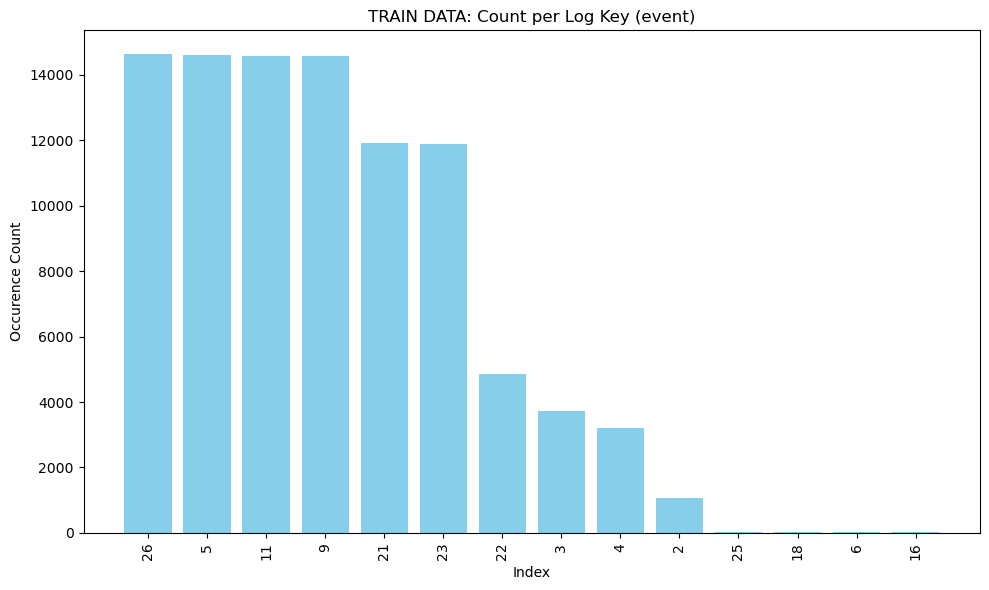

In [158]:
# Plot
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(type_counts_train)), type_counts_train['Occurences'], color='skyblue')
# plt.xlabel('Index')
# plt.ylabel('Counts')
# plt.title('Count per Index')
# plt.xticks(range(len(type_counts_train)), type_counts_train.index, rotation=90)
# plt.tight_layout()
# plt.show()
type_counts_train_sorted = type_counts_train.sort_values(by='Occurences', ascending=False)

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(type_counts_train_sorted)), type_counts_train_sorted['Occurences'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Occurence Count')
plt.title('TRAIN DATA: Count per Log Key (event)')
plt.xticks(range(len(type_counts_train_sorted)), type_counts_train_sorted.index, rotation=90)
plt.tight_layout()
plt.show()

From this plot we can see that:
* 5, 11, 9, 26 are most common.
* 23 and 21 are common as well.
* 22, 2, 3 and 4 are not common. 
* 25, 18, 6, 16 are the most rare events to occur. 

### Occurences of trace lengths
Occurence counts of the different lengths the traces have.

In [159]:
length_counts_train['Length'] = pd.Series(length_counts)
# Fill NaN values with zeros
length_counts_train.fillna(0, inplace=True)
length_counts_train['Length']

19    2563
13     833
21      40
31     129
23     184
25     280
22     242
20     178
27      14
30      15
24     108
26      59
28      97
15       1
14      44
35      13
33       1
32      13
37      14
29      11
36       7
38       7
42       2
Name: Length, dtype: int64

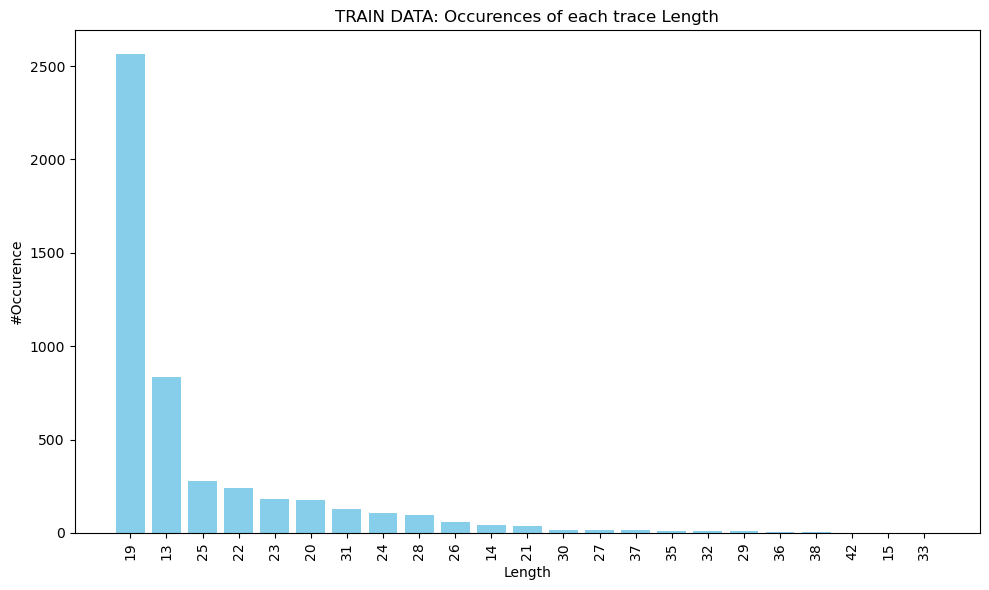

In [162]:
length_counts_train = length_counts_train.sort_values(by='Length', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(length_counts_train)), length_counts_train['Length'], color='skyblue')
plt.xlabel('Length')
plt.ylabel('#Occurence')
plt.title('TRAIN DATA: Occurences of each trace Length')
plt.xticks(range(len(length_counts_train)), length_counts_train.index, rotation=90)
plt.tight_layout()
plt.show()

### Occurence of each key per sequence
IF the log key (type) occurs in a sequence, how often do they occur: (min, max, avg)

In [163]:
# Counts how often each log key (event) occurs in a trace on average, min and max.
def count_occurrences_per_trace(file_path):
    # Initialize a dictionary to store the counts of each type
    type_counts_per_trace = defaultdict(list)
    type_counts_min = defaultdict(int)
    type_counts_max = defaultdict(int)
    type_counts_avg = defaultdict(int)

    with open(file_path, 'r') as file:
        # Read the first line to skip the metadata
        header = file.readline().strip()
        total_lines, num_types = map(int, header.split())
        
        # Read and process each subsequent line
        for line in file:
            # Split the line into numbers
            numbers = list(map(int, line.strip().split()))
            # Skip the first two numbers
            trace = numbers[2:]
            type_count_trace = defaultdict(int)
            # Count the occurrences of each type in the trace
            for num in trace:
                type_count_trace[num] += 1
            for key, value in type_count_trace.items():
                type_counts_per_trace[key].append(value)
            
            if (type_counts_min[num] > type_count_trace[num]): type_counts_min[num] = type_count_trace[num]
            if (type_counts_max[num] < type_count_trace[num]): type_counts_max[num] = type_count_trace[num]
        for i, counts in type_counts_per_trace.items(): 
            type_counts_avg[i] = sum(counts) / len(counts)
    return type_counts_min, type_counts_max, type_counts_avg

In [164]:
type_counts_min = pd.DataFrame()
type_counts_max = pd.DataFrame()
type_counts_avg = pd.DataFrame()

file_path = f'hdfs_train_abbadingo.txt'
type_counts_min, type_counts_max, type_counts_avg = count_occurrences_per_trace(file_path)

print("min")
print(type_counts_min)
print("max")
print(type_counts_max)
print("avg")
print(type_counts_avg)

# print(type_counts_per_trace_train)

min
defaultdict(<class 'int'>, {21: 0, 26: 0, 22: 0, 2: 0, 9: 0, 11: 0, 4: 0, 3: 0})
max
defaultdict(<class 'int'>, {21: 3, 26: 4, 22: 2, 2: 1, 9: 3, 11: 3, 4: 7, 3: 4})
avg
defaultdict(<class 'int'>, {5: 3.0061791967044282, 22: 1.000205973223481, 11: 3.0, 9: 3.0, 26: 3.011740473738414, 23: 3.0, 21: 2.994969818913481, 2: 1.4840499306518724, 3: 3.0440097799511, 4: 2.7866435385949697, 25: 1.7058823529411764, 18: 1.7058823529411764, 6: 1.7058823529411764, 16: 1.7058823529411764})


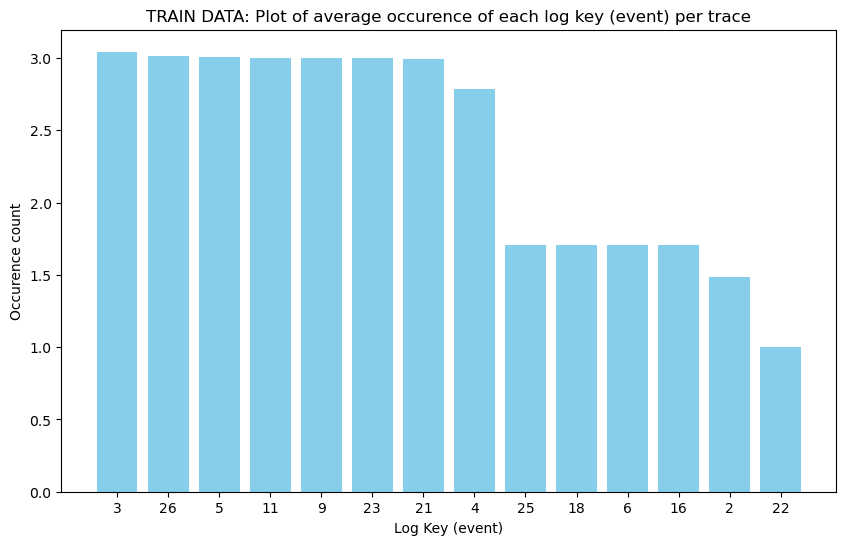

In [166]:

# # Extract keys and values
# keys = list(type_counts_avg.keys())
# values = list(type_counts_avg.values())
# indices = list(range(len(keys)))  # Create a list of indices

# Extract keys and values, then sort them by values in decreasing order
sorted_items = sorted(type_counts_avg.items(), key=lambda item: item[1], reverse=True)
keys, values = zip(*sorted_items)
indices = list(range(len(keys)))  # Create a list of indices

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(indices, values, color='skyblue')

# Adding titles and labels
plt.title('TRAIN DATA: Plot of average occurence of each log key (event) per trace')
plt.xlabel('Log Key (event)')
plt.ylabel('Occurence count')

# Set x-ticks to show keys at each index
plt.xticks(indices, keys)

# Display the plot
plt.show()

## Test data: normal data
The test set with normal traces (positive data) has 553366 traces and 17 types.

### Occurence of each log key (type) in the file

In [167]:
# Create an empty DataFrame to store the counts
columns_test_normal = [f"Subset_{i}" for i in range(1, 7)]
type_counts_test_normal = pd.DataFrame(columns=columns_test_normal)
length_counts_test_normal = pd.DataFrame(columns=columns_test_normal)

# for i in range(1, 223):
for i in range(1, 7):
    file_path = f'hdfs_test_normal/hdfs_test_normal_part{i}.txt'
    type_counts, length_counts = count_occurrences(file_path)
    type_counts_test_normal[f"Subset_{i}"] = pd.Series(type_counts)
    length_counts_test_normal[f"Subset_{i}"] = pd.Series(length_counts)

# Fill NaN values with zeros
type_counts_test_normal.fillna(0, inplace=True)
length_counts_test_normal.fillna(0, inplace=True)

In [168]:
# Display the DataFrame
print(type_counts_test_normal)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
5       7507    7509.0      7508      7508      7516      7508
22      2499    2500.0      2500      2500      2500      2500
11      7497    7500.0      7500      7500      7500      7500
9       7497    7500.0      7500      7500      7500      7500
26      7517    7516.0      7514      7517      7530      7516
23      6117    6147.0      6042      6222      6270      6132
21      6127    6155.0      6049      6230      6286      6140
2        538     573.0       544       595       523       561
3       1906    1900.0      2145      2008      1987      1966
4       1544    1644.0      1626      1619      1615      1713
25        10       9.0         8         8        16         8
18        10       9.0         8         8        16         8
6         10       9.0         8         8        16         8
16        10       9.0         8         8        16         8
20         1       0.0         3         1         4   

In [169]:
print(length_counts_test_normal)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
19      1318    1312.0      1277      1341    1393.0    1293.0
13       431     419.0       454       402     385.0     438.0
20        86      98.0       108       103      85.0      98.0
30         6       9.0         4         4       8.0       8.0
29        10       8.0         8         5      10.0       7.0
24        56      55.0        48        63      52.0      57.0
25       136     160.0       146       128     163.0     139.0
23       113      97.0        99       104      71.0     117.0
32         8      11.0         8         5       6.0       6.0
22       131     134.0       130       133     103.0     121.0
28        69      55.0        57        50      72.0      56.0
36         3       3.0         8         7       6.0       8.0
31        52      47.0        63        59      53.0      61.0
14        22      23.0        24        17      16.0      14.0
21        18      14.0        20        19      22.0   

In [170]:
type_counts_test_normal['Average'] = type_counts_test_normal.mean(axis=1)
print(type_counts_test_normal['Average'])

5     7509.333333
22    2499.833333
11    7499.500000
9     7499.500000
26    7518.333333
23    6155.000000
21    6164.500000
2      555.666667
3     1985.333333
4     1626.833333
25       9.833333
18       9.833333
6        9.833333
16       9.833333
20       1.666667
Name: Average, dtype: float64


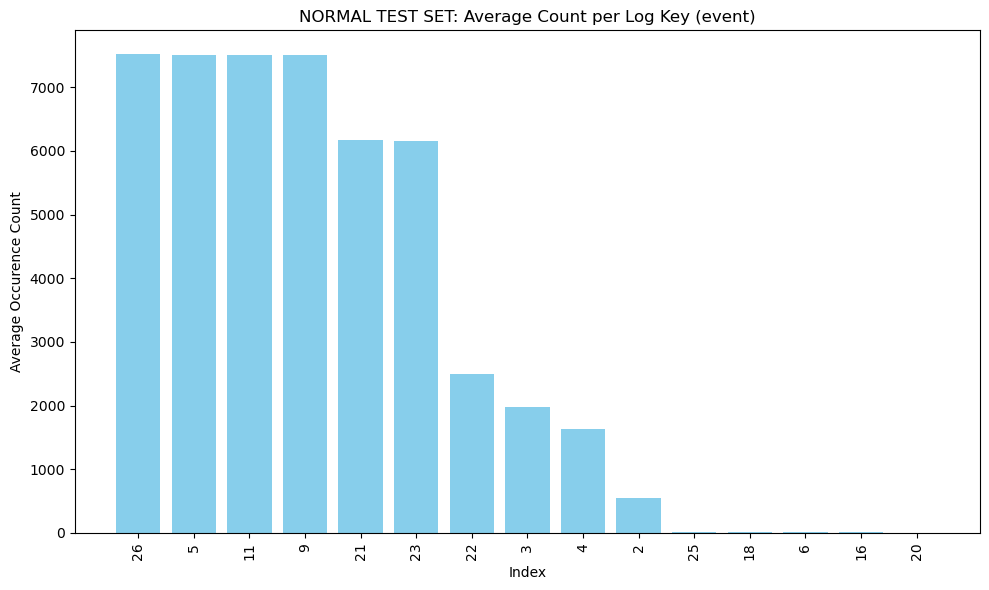

In [173]:
type_counts_test_normal_sorted = type_counts_test_normal.sort_values(by='Average', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(type_counts_test_normal_sorted)), type_counts_test_normal_sorted['Average'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Average Occurence Count')
plt.title('NORMAL TEST SET: Average Count per Log Key (event)')
plt.xticks(range(len(type_counts_test_normal_sorted)), type_counts_test_normal_sorted.index, rotation=90)
plt.tight_layout()
plt.show()


From this plot we can see that:
* 26, 5, 11, 9 are most common.
* 23 and 21 are common as well.
* 22, 2, 3 and 4 are not common. 
* 25, 28, 6, 16 and 20 are the most rare events to occur. 

### Occurences of trace lengths
Occurence counts of the different lengths the traces have.

In [174]:
print(length_counts_test_normal)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
19      1318    1312.0      1277      1341    1393.0    1293.0
13       431     419.0       454       402     385.0     438.0
20        86      98.0       108       103      85.0      98.0
30         6       9.0         4         4       8.0       8.0
29        10       8.0         8         5      10.0       7.0
24        56      55.0        48        63      52.0      57.0
25       136     160.0       146       128     163.0     139.0
23       113      97.0        99       104      71.0     117.0
32         8      11.0         8         5       6.0       6.0
22       131     134.0       130       133     103.0     121.0
28        69      55.0        57        50      72.0      56.0
36         3       3.0         8         7       6.0       8.0
31        52      47.0        63        59      53.0      61.0
14        22      23.0        24        17      16.0      14.0
21        18      14.0        20        19      22.0   

In [175]:
length_counts_test_normal['Average'] = length_counts_test_normal.mean(axis=1)
print(length_counts_test_normal['Average'])

19    1322.333333
13     421.500000
20      96.333333
30       6.500000
29       8.000000
24      55.166667
25     145.333333
23     100.166667
32       7.333333
22     125.333333
28      59.833333
36       5.833333
31      55.833333
14      19.333333
21      19.333333
35       6.666667
15       0.500000
26      30.833333
27       5.833333
37       4.333333
38       2.333333
Name: Average, dtype: float64


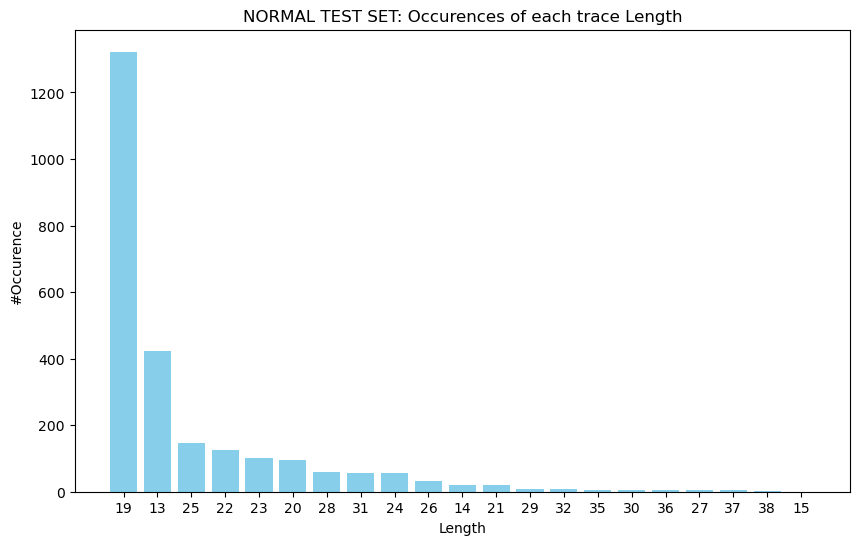

In [176]:

# Extract keys and values, then sort them by values in decreasing order
sorted_items = sorted(length_counts_test_normal['Average'].items(), key=lambda item: item[1], reverse=True)
keys, values = zip(*sorted_items)
indices = list(range(len(keys)))  # Create a list of indices

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(indices, values, color='skyblue')

# Adding titles and labels
plt.xlabel('Length')
plt.ylabel('#Occurence')
plt.title('NORMAL TEST SET: Occurences of each trace Length')

# Set x-ticks to show keys at each index
plt.xticks(indices, keys)

# Display the plot
plt.show()

### Occurence of each log key (type) per sequence
IF the log key (type) occurs in a sequence, how often do they occur: (min, max, avg).

In [79]:
# Create an empty DataFrame to store the counts
columns_test_normal_min = pd.DataFrame()
columns_test_normal_max = pd.DataFrame()
columns_test_normal_avg = pd.DataFrame()

for i in range(1, 7):
    file_path = f'hdfs_test_normal/hdfs_test_normal_part{i}.txt'
    type_counts_min, type_counts_max, type_counts_avg = count_occurrences_per_trace(file_path)
    columns_test_normal_min[f"Subset_{i}"] = pd.Series(type_counts_min)
    columns_test_normal_max[f"Subset_{i}"] = pd.Series(type_counts_max)
    columns_test_normal_avg[f"Subset_{i}"] = pd.Series(type_counts_avg)

# # Fill NaN values with zeros
columns_test_normal_min.fillna(0, inplace=True)
columns_test_normal_max.fillna(0, inplace=True)
columns_test_normal_avg.fillna(0, inplace=True)


In [80]:
print(columns_test_normal_min)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
21         0         0       0.0       0.0         0       0.0
26         0         0       0.0       0.0         0       0.0
2          0         0       0.0       0.0         0       0.0
11         0         0       0.0       0.0         0       0.0


In [81]:
print(columns_test_normal_max)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
21         3         3       4.0       3.0         4       3.0
26         3         4       4.0       3.0         3       3.0
2          2         1       2.0       2.0         1       1.0
11         3         3       0.0       0.0         3       0.0


In [16]:
print(columns_test_normal_avg)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
5   3.004002  3.003600  3.003200  3.003200  3.006400  3.003200
22  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
11  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000
9   3.000000  3.000000  3.000000  3.000000  3.000000  3.000000
26  3.008003  3.006400  3.005600  3.006800  3.012000  3.006400
23  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000
21  2.996088  2.992222  2.994554  2.995192  2.994759  2.998047
2   1.457995  1.496084  1.439153  1.480100  1.533724  1.420253
3   2.968847  2.932099  3.351562  3.182250  3.230894  3.006116
4   2.569052  2.651613  2.741990  2.730185  2.789292  2.799020
25  1.666667  1.000000  1.000000  1.333333  1.600000  2.000000
18  1.666667  1.000000  1.000000  1.333333  1.600000  2.000000
6   1.666667  1.000000  1.000000  1.333333  1.600000  2.000000
16  1.666667  1.000000  1.000000  1.333333  1.600000  2.000000
20  1.000000  0.000000  1.000000  1.000000  1.000000  1

3     3.111962
26    3.007534
5     3.003934
11    3.000000
9     3.000000
23    3.000000
21    2.995144
4     2.713525
2     1.471218
25    1.433333
18    1.433333
6     1.433333
16    1.433333
22    1.000000
20    0.833333
Name: Average, dtype: float64


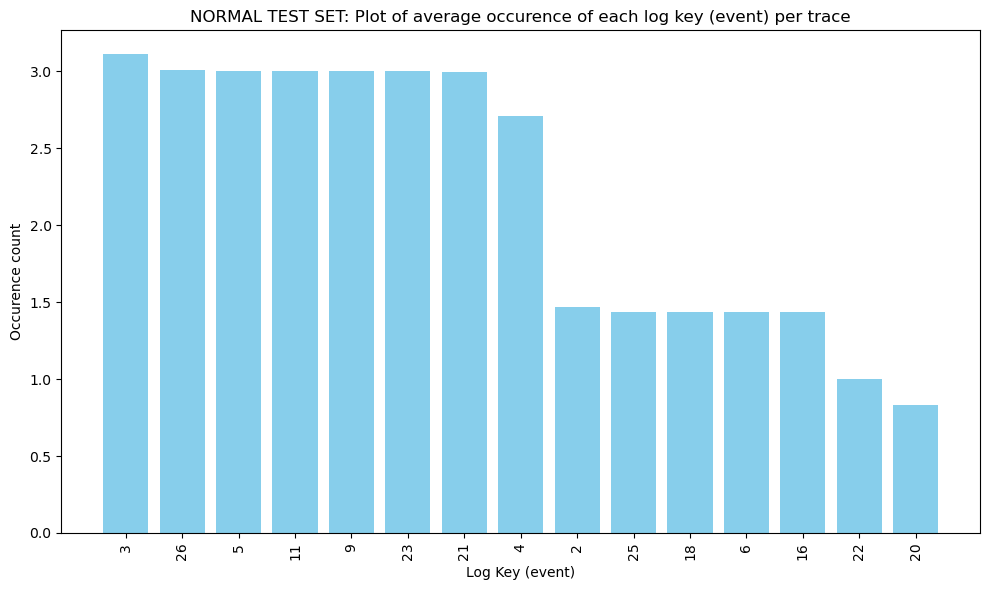

In [177]:
# Calculate the average of each row
columns_test_normal_avg['Average'] = columns_test_normal_avg.mean(axis=1)
columns_test_normal_avg_sorted = columns_test_normal_avg.sort_values(by='Average', ascending=False)

# # Display the result
print(columns_test_normal_avg_sorted['Average'])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(columns_test_normal_avg_sorted)), columns_test_normal_avg_sorted['Average'], color='skyblue')
plt.title('NORMAL TEST SET: Plot of average occurence of each log key (event) per trace')
plt.xlabel('Log Key (event)')
plt.ylabel('Occurence count')
plt.xticks(range(len(columns_test_normal_avg_sorted)), columns_test_normal_avg_sorted.index, rotation=90)
plt.tight_layout()
plt.show()

## Test data: abnormal data
The test set with abnormal traces (negative data) has 16838 traces and 28 types.

### Occurence of each log key (type) in the file

In [178]:
# Create an empty DataFrame to store the counts
columns_test_abnormal = [f"Subset_{i}" for i in range(1, 7)]
type_counts_test_abnormal = pd.DataFrame(columns=columns_test_abnormal)
length_counts_test_abnormal = pd.DataFrame(columns=columns_test_abnormal)

for i in range(1, 7):
    file_path = f'hdfs_test_abnormal/hdfs_test_abnormal{i}.txt'
    type_counts, length_counts = count_occurrences(file_path)
    type_counts_test_abnormal[f"Subset_{i}"] = pd.Series(type_counts)
    length_counts_test_abnormal[f"Subset_{i}"] = pd.Series(length_counts)

# Fill NaN values with zeros
type_counts_test_abnormal.fillna(0, inplace=True)
length_counts_test_abnormal.fillna(0, inplace=True)

In [179]:
# Display the DataFrame
print(type_counts_test_abnormal)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
5       8181      8266    8191.0    8128.0    8130.0      5049
22      2999      3000    3000.0    3000.0    3000.0      1839
11      5689      5843    5688.0    5640.0    5667.0      3483
9       5649      5818    5661.0    5610.0    5639.0      3468
26      7124      7300    7203.0    7089.0    7099.0      4441
4       1404      1401    1619.0    1498.0    1460.0       877
3       1975      2354    2069.0    2112.0    1942.0      1390
2        537       560     551.0     605.0     511.0       365
23      5664      5833    5652.0    5663.0    5646.0      3465
21      6282      6459    6317.0    6269.0    6265.0      3881
28       203       235     238.0     227.0     230.0       143
27       194       174     153.0     172.0     194.0        85
20       961       995     935.0     946.0     933.0       553
25       794       791     800.0     783.0     772.0       519
18       794       791     800.0     783.0     772.0   

In [180]:
type_counts_test_abnormal['Average'] = type_counts_test_abnormal.mean(axis=1)
print(type_counts_test_abnormal['Average'])

5     7657.500000
22    2806.333333
11    5335.000000
9     5307.500000
26    6709.333333
4     1376.500000
3     1973.666667
2      521.500000
23    5320.500000
21    5912.166667
28     212.666667
27     162.000000
20     887.166667
25     743.166667
18     743.166667
16     732.500000
6      746.666667
17       7.833333
13     244.000000
7       15.000000
10      14.833333
14      12.833333
8        8.166667
12       5.666667
15      10.833333
19       0.833333
Name: Average, dtype: float64


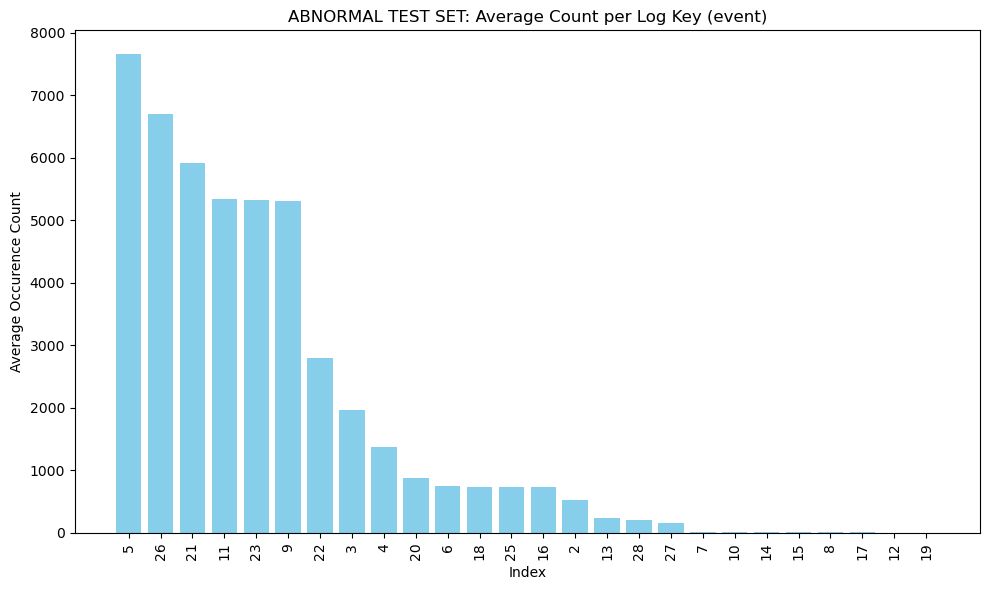

In [181]:

type_counts_test_abnormal_sorted = type_counts_test_abnormal.sort_values(by='Average', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(type_counts_test_abnormal_sorted)), type_counts_test_abnormal_sorted['Average'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Average Occurence Count')
plt.title('ABNORMAL TEST SET: Average Count per Log Key (event)')
plt.xticks(range(len(type_counts_test_abnormal_sorted)), type_counts_test_abnormal_sorted.index, rotation=90)
plt.tight_layout()
plt.show()

From this plot we can see that:
* 5 and 26 are the most occuring events.
* 11, 9, 23 and 21 are quite common.
* 22, 4, 3 already occur almost less than half the count of the common events.
* 20, 25, 18, 16, 6 occur about the same. 
* 2, 28, 27, 17, 13, 7, 10, 14, 8, 12, 15, 19 barely occur.

### Occurences of trace lengths
Occurence counts of the different lengths the traces have.

In [182]:
print(length_counts_test_abnormal)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
25        49      46.0      38.0      41.0      47.0      24.0
3        586     561.0     584.0     570.0     571.0     357.0
2        520     494.0     521.0     551.0     544.0     322.0
20       663     708.0     638.0     642.0     676.0     390.0
29       120     104.0     108.0     105.0     102.0      74.0
26       134     132.0     133.0     150.0     134.0      72.0
33        41      46.0      47.0      38.0      35.0      22.0
24        73      60.0      59.0      51.0      65.0      33.0
41        74      53.0      72.0      63.0      56.0      43.0
17         3       4.0       2.0       0.0       2.0       1.0
23        50      63.0      50.0      58.0      50.0      20.0
27       165     182.0     193.0     178.0     186.0     131.0
31        38      27.0      20.0      35.0      27.0      25.0
42        34      22.0      33.0      31.0      33.0      22.0
14        27      22.0      20.0      23.0      26.0   

In [183]:
length_counts_test_abnormal['Average'] = length_counts_test_abnormal.mean(axis=1)
print(length_counts_test_abnormal['Average'])

25     40.833333
3     538.166667
2     492.000000
20    619.500000
29    102.166667
26    125.833333
33     38.166667
24     56.833333
41     60.166667
17      2.000000
23     48.500000
27    172.500000
31     28.666667
42     29.166667
14     22.833333
21    102.666667
22     68.000000
32     33.166667
30     58.500000
28     60.500000
38     26.000000
37      6.000000
11      1.333333
39     14.000000
15      1.833333
19      1.833333
16     13.833333
35      3.166667
40      7.500000
34     10.333333
36      5.666667
43      6.333333
44      2.166667
13      0.333333
6       1.666667
Name: Average, dtype: float64


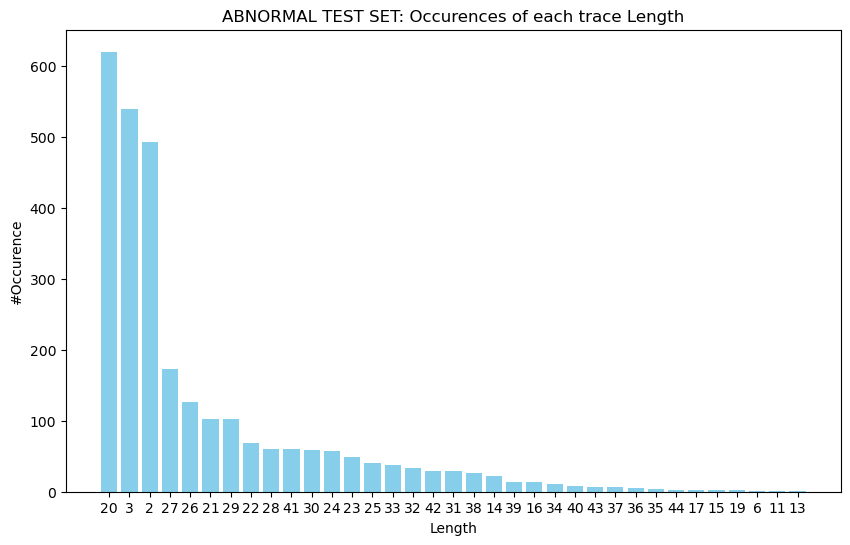

In [184]:

# Extract keys and values, then sort them by values in decreasing order
sorted_items = sorted(length_counts_test_abnormal['Average'].items(), key=lambda item: item[1], reverse=True)
keys, values = zip(*sorted_items)
indices = list(range(len(keys)))  # Create a list of indices

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(indices, values, color='skyblue')

# Adding titles and labels
plt.xlabel('Length')
plt.ylabel('#Occurence')
plt.title('ABNORMAL TEST SET: Occurences of each trace Length')

# Set x-ticks to show keys at each index
plt.xticks(indices, keys)

# Display the plot
plt.show()

### Occurence of each log key (type) per sequence
IF the log key (type) occurs in a sequence, how often do they occur: (min, max, avg)

In [185]:
# Create an empty DataFrame to store the counts
columns_test_abnormal_min = pd.DataFrame()
columns_test_abnormal_max = pd.DataFrame()
columns_test_abnormal_avg = pd.DataFrame()
type_counts_per_trace_test_normal = pd.DataFrame(columns=columns_test_normal)

for i in range(1, 7):
    file_path = f'hdfs_test_abnormal/hdfs_test_abnormal{i}.txt'
    type_counts_min, type_counts_max, type_counts_avg = count_occurrences_per_trace(file_path)
    columns_test_abnormal_min[f"Subset_{i}"] = pd.Series(type_counts_min)
    columns_test_abnormal_max[f"Subset_{i}"] = pd.Series(type_counts_max)
    columns_test_abnormal_avg[f"Subset_{i}"] = pd.Series(type_counts_avg)

# # Fill NaN values with zeros
columns_test_abnormal_min.fillna(0, inplace=True)
columns_test_abnormal_max.fillna(0, inplace=True)
columns_test_abnormal_avg.fillna(0, inplace=True)


In [186]:
print(columns_test_abnormal_min)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
21         0       0.0       0.0       0.0       0.0       0.0
5          0       0.0       0.0       0.0       0.0       0.0
22         0       0.0       0.0       0.0       0.0       0.0
20         0       0.0       0.0       0.0       0.0       0.0
17         0       0.0       0.0       0.0       0.0       0.0
26         0       0.0       0.0       0.0       0.0       0.0
11         0       0.0       0.0       0.0       0.0       0.0
2          0       0.0       0.0       0.0       0.0       0.0
27         0       0.0       0.0       0.0       0.0       0.0
10         0       0.0       0.0       0.0       0.0       0.0
7          0       0.0       0.0       0.0       0.0       0.0


In [187]:
print(columns_test_abnormal_max)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
21         5      11.0       7.0       8.0       5.0      13.0
5          2       2.0       2.0       2.0       2.0       2.0
22         1       1.0       1.0       1.0       1.0       1.0
20         3       2.0       2.0       2.0       3.0       2.0
17         1       1.0       0.0       0.0       1.0       1.0
26         3       4.0       3.0       3.0       3.0       3.0
11         3       3.0       2.0       2.0       2.0       2.0
2          1       1.0       1.0       1.0       0.0       1.0
27         1       1.0       1.0       1.0       1.0       1.0
10         2       1.0       1.0       1.0       1.0       2.0
7          1       0.0       1.0       1.0       1.0       0.0


In [188]:
print(columns_test_abnormal_avg)

    Subset_1  Subset_2  Subset_3  Subset_4  Subset_5  Subset_6
5   2.727909  2.755333  2.730333  2.709333  2.710000  2.745514
22  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
11  3.005283  3.004113  3.001583  3.001597  3.006366  3.002586
9   2.993641  2.994339  2.996824  2.995195  2.996281  2.997407
26  3.775305  3.757077  3.813129  3.784837  3.772051  3.838375
4   2.511628  2.501786  2.739425  2.628070  2.607143  2.594675
3   3.062016  3.599388  3.149163  3.310345  3.015528  3.573265
2   1.463215  1.521739  1.513736  1.617647  1.468391  1.553191
23  3.091703  3.087877  3.081788  3.094536  3.080196  3.096515
21  3.406725  3.401264  3.423848  3.414488  3.401194  3.443656
28  1.025253  1.026201  1.034783  1.008889  1.017699  1.028777
27  1.000000  1.000000  1.000000  1.000000  1.005181  1.000000
20  1.044565  1.032158  1.042363  1.038419  1.043624  1.024074
25  1.268371  1.277868  1.290323  1.260870  1.280265  1.287841
18  1.268371  1.277868  1.290323  1.260870  1.280265  1

26    3.790129
21    3.415196
3     3.284951
23    3.088769
11    3.003588
13    3.000000
9     2.995614
5     2.729737
4     2.597121
14    1.741138
7     1.723701
15    1.674934
2     1.522987
10    1.397619
12    1.333333
6     1.294733
25    1.277589
18    1.277589
16    1.269135
8     1.078571
20    1.037534
28    1.023600
17    1.018519
27    1.000864
22    1.000000
19    0.583333
Name: Average, dtype: float64


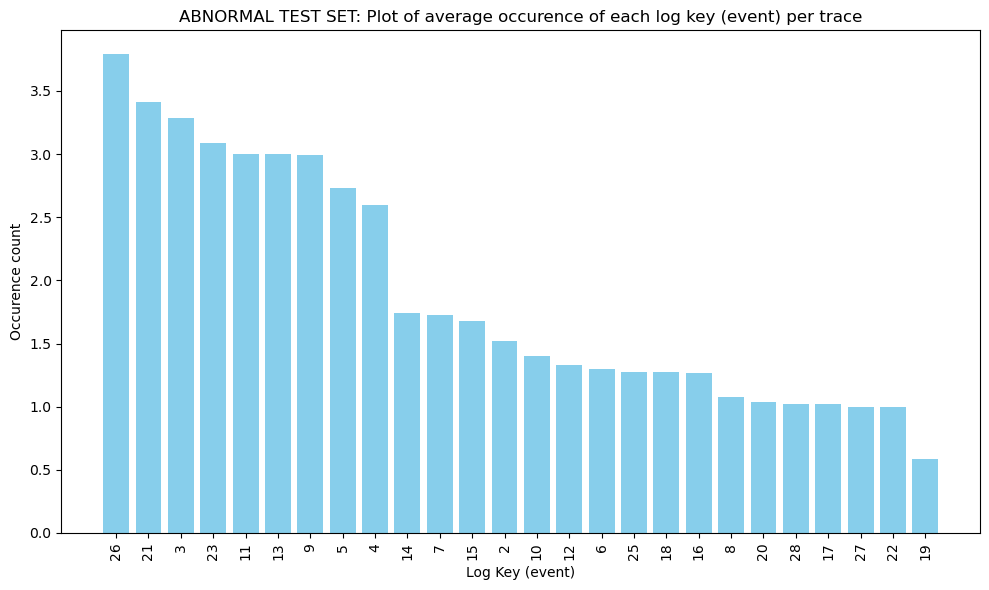

In [189]:
# Calculate the average of each row
columns_test_abnormal_avg['Average'] = columns_test_abnormal_avg.mean(axis=1)
columns_test_abnormal_avg_sorted = columns_test_abnormal_avg.sort_values(by='Average', ascending=False)

# # Display the result
print(columns_test_abnormal_avg_sorted['Average'])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(columns_test_abnormal_avg_sorted)), columns_test_abnormal_avg_sorted['Average'], color='skyblue')
plt.title('ABNORMAL TEST SET: Plot of average occurence of each log key (event) per trace')
plt.xlabel('Log Key (event)')
plt.ylabel('Occurence count')
plt.xticks(range(len(columns_test_abnormal_avg_sorted)), columns_test_abnormal_avg_sorted.index, rotation=90)
plt.tight_layout()
plt.show()

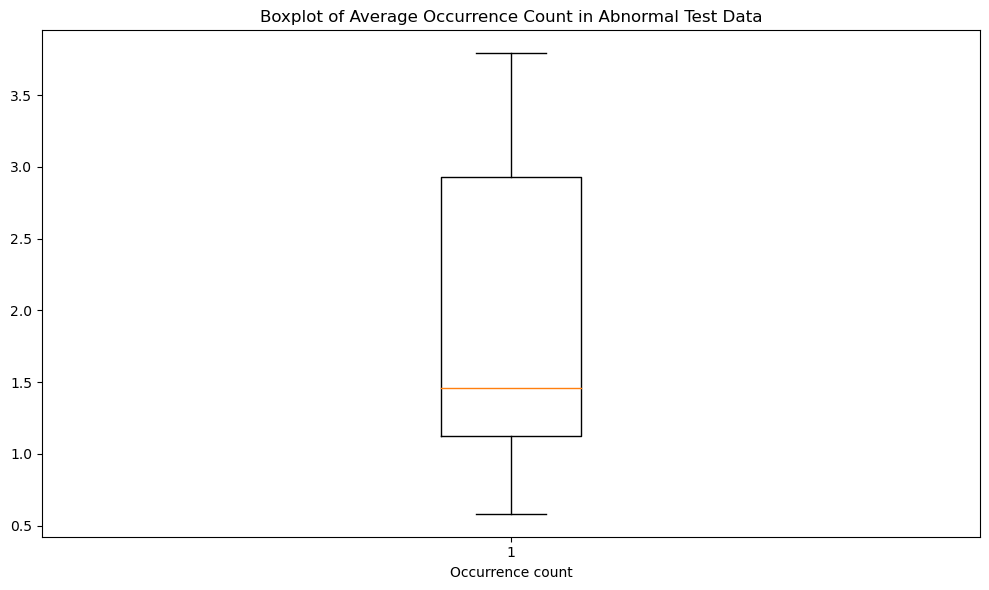

In [191]:

data = columns_test_abnormal_avg_sorted['Average']

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)

# Adding titles and labels
plt.title('Boxplot of Average Occurrence Count in Abnormal Test Data')
plt.xlabel('Occurrence count')

# Display the plot
plt.tight_layout()
plt.show()